In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
#!pip install cmake "gym[atari]" scipy

In [2]:
import gym
#Loading and rendering the gym environment
env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [3]:
print('Number of states: {}'.format(env.observation_space.n))
print('Number of actions: {}'.format(env.action_space.n))

Number of states: 500
Number of actions: 6


In [4]:
#Setting the hyperparameters
decay = 0.001

#learning rate
alpha = 0.5              
max_alpha = 0.9
min_alpha = 0.05

#discount factor
gamma = 1
max_gamma = 1
min_gamma = 0.9

#exploring epsilon
epsilon = 1                  
max_epsilon = 1
min_epsilon = 0.01
         
#Creating lists to keep track of reward and parameter values
training_rewards = []  
epsilons = []
alphas = []
gammas = []
max_steps = 100


In [5]:
#initialising qtable dictionary
# A nested dictionary that maps 
# state -> (action -> action-value). 
q = {}
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        q[(s,a)] = 0.0

In [6]:
def exploring_func(state, epsilon):
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return max(list(range(env.action_space.n)), key = lambda x: q[(state,x)])

In [7]:
def update_q_table(prev_state, action, reward, nextstate, alpha, gamma):
    
    qa = max([q[(nextstate, a)] for a in range(env.action_space.n)])
    q[(prev_state,action)] += alpha * (reward + gamma * qa - q[(prev_state,action)])

In [8]:
def decay_alpha(alpha, max_alpha, min_alpha, decay, episode): 
        alpha = min_alpha + (max_alpha - min_alpha)*np.exp(-decay*episode)  
        return alpha

In [9]:
def decay_epsilon( epsilon, min_epsilon, max_epsilon, decay ,episode):
    #Cutting down on exploration by reducing the epsilon 
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay*episode)
        return epsilon

In [10]:
def decay_gamma(gamma, min_gamma, max_gamma, decay, episode): 
    gamma = min_gamma + (max_gamma - min_gamma)*np.exp(-decay*episode)
    return gamma

In [11]:
%%time
num_of_episodes = 100000
for episode in range(num_of_episodes):
    # Reset the enviroment
    state = env.reset()
    
    # Initialize variables
    reward = 0
    terminated = False

    #Starting the tracker for the rewards
    total_training_rewards = 0

    for step in range(100):
        # Take learned path or explore new actions based on the epsilon
        action = exploring_func(state, epsilon)

        # Take action    
        next_state, reward, terminated, info = env.step(action) 
        update_q_table(state, action, reward, next_state, alpha, gamma)
        #Increasing our total reward and updating the state
        total_training_rewards += reward
        state = next_state

        #Ending the episode
        if terminated == True:
            #print ("Total reward for episode {}: {}".format(episode, total_training_rewards))
            break
            
    alpha = decay_alpha(alpha, max_alpha, min_alpha, decay, episode)
    gamma = decay_gamma(gamma, min_gamma, max_gamma, decay, episode)
    epsilon = decay_epsilon( epsilon, min_epsilon, max_epsilon, decay ,episode)
        
    #Adding the total reward and reduced parameter values
    training_rewards.append(total_training_rewards)
    epsilons.append(epsilon)
    alphas.append(alpha)
    gammas.append(gamma)

    if (episode + 1) % 100 == 0:
        clear_output(wait=True)
        print("Episode: {}".format(episode + 1))
        env.render()

print("**********************************")
print("Training is done!\n")
print("**********************************")
print ("Training score over time: " + str(sum(training_rewards)/num_of_episodes))

Episode: 100000
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
**********************************
Training is done!

**********************************
Training score over time: 5.47123
Wall time: 45 s


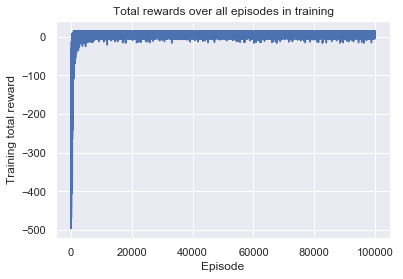

In [12]:
#Visualizing results and total reward over all episodes
num_of_episodes = 100000
x = range(num_of_episodes)
plt.plot(x, training_rewards)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('Total rewards over all episodes in training') 
plt.show()

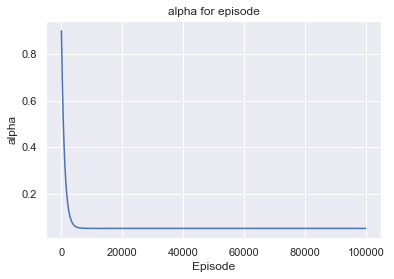

In [13]:
#Visualizing the alphas over all episodes
plt.plot(alphas)
plt.xlabel('Episode')
plt.ylabel('alpha')
plt.title("alpha for episode")
plt.show()

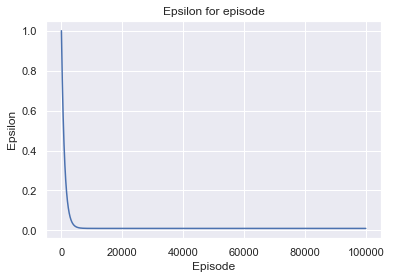

In [14]:
#Visualizing the epsilons over all episodes
plt.plot(epsilons)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title("Epsilon for episode")
plt.show()

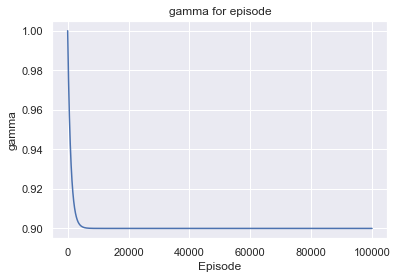

In [15]:
#Visualizing the gammas over all episodes
plt.plot(gammas)
plt.xlabel('Episode')
plt.ylabel('gamma')
plt.title("gamma for episode")
plt.show()

In [16]:
total_epochs, total_penalties = 0, 0
num_of_episodes = 100

for _ in range(num_of_episodes):
    state = env.reset()
    epochs = 0
    penalties = 0
    reward = 0
    
    terminated = False
    
    while not terminated:
        action = np.argmax([q[(state, a)] for a in range(env.action_space.n)])
        state, reward, terminated, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print("**********************************")
print("Results")
print("**********************************")
print("Epochs per episode: {}".format(total_epochs / num_of_episodes))
print("Penalties per episode: {}".format(total_penalties / num_of_episodes))

**********************************
Results
**********************************
Epochs per episode: 13.85
Penalties per episode: 0.0


In [ ]:
total_penalties

In [ ]:
epsilons

In [ ]:
gammas

In [ ]:
alphas